In [16]:
import numpy as np      ## sirve para manipular arrays
import pandas as pd     ## sirve para manipular dataframes
import matplotlib.pyplot as plt     ## sirve para realizar plots
import seaborn as sns               ## sirve para realizar plots

In [17]:
# Cargar la base de datos

Reclamos=pd.read_csv('Base_Datos_202010.csv')
Reclamos.head()

C:\Users\Cristian Restrepo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DANE_DEPTO,DANE_MUN,DANE_LOC,RADICADO,FECHA_RADICADO,TIPO_TRAMITE,CAUSAL,DETALLE_CAUSAL,NUI,FACTURA,TIPO_RTA,FECHA_RTA,RAD_RTA,FECHA_NOTIF,TIPO_NOTIF,F_SSPD
0,8,1,0,RE1110201706563,20-02-2017,1,F,118,20004567,7773659016,10,NaN,NaN,NaN,4,NaN
1,8,1,0,RE1110201713228,10-04-2017,1,F,102,17205311,2250644189,10,NaN,NaN,NaN,4,NaN
2,8,1,0,RE1110201731806,13-08-2017,1,F,122,17141535,2191113211,10,NaN,NaN,NaN,4,NaN
3,8,1,0,RE1110201732325,16-08-2017,1,F,102,17259404,2131679238,10,NaN,NaN,NaN,4,NaN
4,8,1,0,RE1110201734341,31-08-2017,1,F,102,19677691,7627906055,10,NaN,NaN,NaN,4,NaN


In [18]:
## Revisar el tamaño del dataset

Reclamos.shape

(66199, 16)

In [19]:
## Obtener el tipo de dato de cada variable y la totalidad de las entradas

Reclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66199 entries, 0 to 66198
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DANE_DEPTO      66199 non-null  int64 
 1   DANE_MUN        66199 non-null  int64 
 2   DANE_LOC        66199 non-null  int64 
 3   RADICADO        66199 non-null  object
 4   FECHA_RADICADO  66199 non-null  object
 5   TIPO_TRAMITE    66199 non-null  int64 
 6   CAUSAL          66199 non-null  object
 7   DETALLE_CAUSAL  66199 non-null  int64 
 8   NUI             66199 non-null  int64 
 9   FACTURA         66199 non-null  object
 10  TIPO_RTA        66199 non-null  int64 
 11  FECHA_RTA       34995 non-null  object
 12  RAD_RTA         34995 non-null  object
 13  FECHA_NOTIF     6848 non-null   object
 14  TIPO_NOTIF      66199 non-null  int64 
 15  F_SSPD          1243 non-null   object
dtypes: int64(8), object(8)
memory usage: 8.1+ MB


In [20]:
## Se elimina la variable que no aporta informacion al proposito del proyecto, como numero de radicado, NUI (Identificacion del cliente), numero de factura dado que son distintas siempre

Reclamos = Reclamos.drop(['RADICADO', 'NUI', 'FACTURA'], axis = 1)

In [21]:
## revisar si existen datos faltantes dentro del dataframe

Reclamos.isnull().sum()

DANE_DEPTO            0
DANE_MUN              0
DANE_LOC              0
FECHA_RADICADO        0
TIPO_TRAMITE          0
CAUSAL                0
DETALLE_CAUSAL        0
TIPO_RTA              0
FECHA_RTA         31204
RAD_RTA           31204
FECHA_NOTIF       59351
TIPO_NOTIF            0
F_SSPD            64956
dtype: int64

In [22]:
## Se elimina la variable FECHA_RTA, RAD_RTA, FECHA_NOTIF, F_SSPD dado que no aporta informacion relevante al proposito del proyecto y se tienen varios campos nulos

Reclamos = Reclamos.drop(['FECHA_RTA', 'RAD_RTA', 'FECHA_NOTIF', 'F_SSPD'], axis = 1)

In [23]:
## se revisa nuevamente si existen datos faltantes dentro del dataframe

Reclamos.isnull().sum()

DANE_DEPTO        0
DANE_MUN          0
DANE_LOC          0
FECHA_RADICADO    0
TIPO_TRAMITE      0
CAUSAL            0
DETALLE_CAUSAL    0
TIPO_RTA          0
TIPO_NOTIF        0
dtype: int64

In [24]:
## Revisar el tamaño del dataset

Reclamos.shape

(66199, 9)

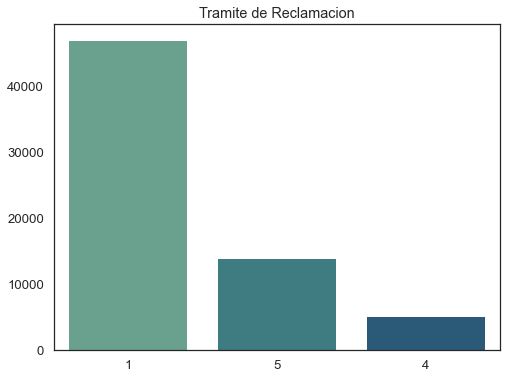

In [25]:
# Se grafica la variable objetivo, en este caso es el tipo de tramite de reclamacion

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = Reclamos['TIPO_TRAMITE'], data = Reclamos, palette = 'crest', order = Reclamos.TIPO_TRAMITE.value_counts().index)
plt.title('Tramite de Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()

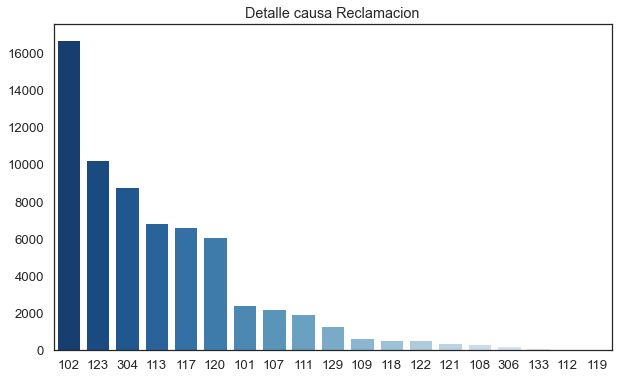

In [26]:
# Se grafica la variable detalle de causal, la cual es una variable categorica
sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['DETALLE_CAUSAL'], data = Reclamos, palette = 'Blues_r', order = Reclamos.DETALLE_CAUSAL.value_counts().index)
plt.title('Detalle causa Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()

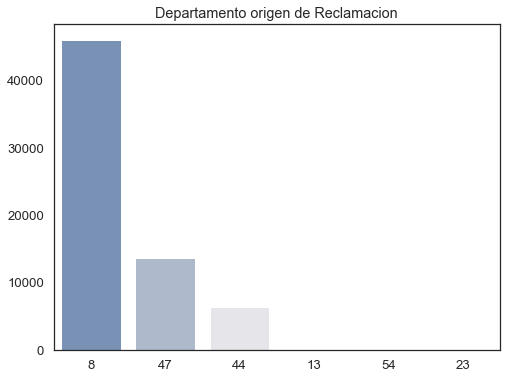

In [27]:
# Se grafica la variable departamento, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = Reclamos['DANE_DEPTO'], data = Reclamos, palette = 'vlag', order = Reclamos.DANE_DEPTO.value_counts().index)
plt.title('Departamento origen de Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()


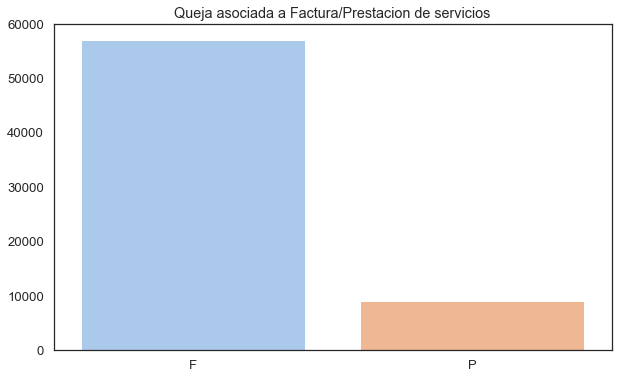

In [28]:
# Se grafica la variable causal, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['CAUSAL'], data = Reclamos, palette = 'pastel', order = Reclamos.CAUSAL.value_counts().index)
plt.title('Queja asociada a Factura/Prestacion de servicios')
ax.set(xlabel=None, ylabel=None)
plt.show()

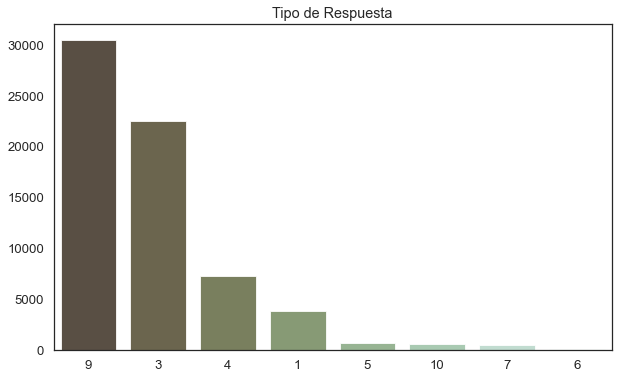

In [29]:
# Se grafica la variable tipo de respuesta, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['TIPO_RTA'], data = Reclamos, palette = 'ch:1,r=.5,l=.9_r', order = Reclamos.TIPO_RTA.value_counts().index, alpha = 0.8)
plt.title('Tipo de Respuesta')
ax.set(xlabel=None, ylabel=None)
plt.show()

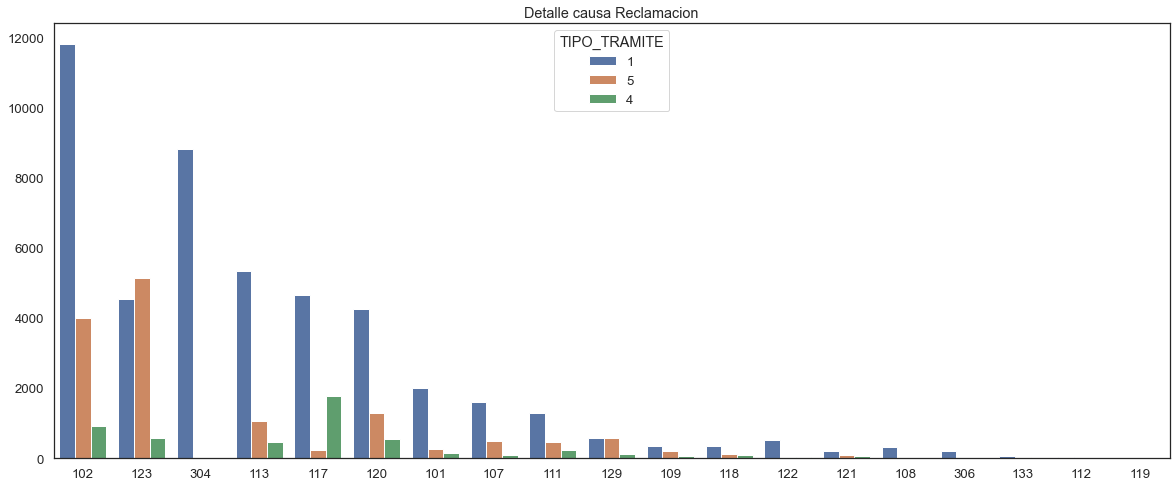

In [30]:
# Se grafica el detalle causal dividido cada uno por el tipo de tramite (nuestra variable objetivo)

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(20,8))
ax = sns.countplot(x = Reclamos['DETALLE_CAUSAL'], data = Reclamos, hue = Reclamos['TIPO_TRAMITE'] ,order = Reclamos.DETALLE_CAUSAL.value_counts().index, hue_order=Reclamos.TIPO_TRAMITE.value_counts().index)
plt.title('Detalle causa Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()